# Global Power Plant Database
## C Soma sekhar goud
## Batch.No: DS2307

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [122]:
df = pd.read_csv("database_IND.csv")

In [123]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [124]:
df.shape

(907, 27)

In [125]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [126]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

other_fuel1, other_fuel2, other_fuel3,wepp_id,generation_gwh_2013,generation_gwh_2019,estimated_generation_gwh this columns have absolutely no values there is no chance of replacing it with mean or any other factors so we will drop those columns

In [127]:
# List of columns to drop
columns_to_drop = ['other_fuel1','other_fuel2', 'other_fuel3', 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2019', 'estimated_generation_gwh']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [128]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
# categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(exclude=['object']).columns

# categorical columns
print("Categorical Columns:")
print(categorical_columns)

# numerical columns
print("\nNumerical Columns:")
print(numerical_columns)

Categorical Columns:
Index(['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'owner',
       'source', 'url', 'geolocation_source', 'generation_data_source'],
      dtype='object')

Numerical Columns:
Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')


In [130]:
# Replace NaN values with the mean for each column
df = df.fillna(df.mean())

In [131]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
commissioning_year          0
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data       0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_gwh_2018         0
generation_data_source    458
dtype: int64

In case of owner,generation_data_source null values are so high . We cannot fill those nullvalues using median it's not the right thing as owers as shareholder of the power plant can be indivudal and we cannot generalize it  

In [132]:
df['generation_data_source'].unique()

array([nan, 'Central Electricity Authority'], dtype=object)

In [133]:
df['country'].unique()

array(['IND'], dtype=object)

In [134]:
df['country_long'].unique()

array(['India'], dtype=object)

All powerplants we analysing are in India

In [135]:
#unique name
print(len(df['name'].unique()))


907


In [136]:
# Select relevant columns
selected_columns = ['name', 'capacity_mw', 'primary_fuel', 'commissioning_year', 'year_of_capacity_data',
                    'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
                    'generation_gwh_2017', 'generation_gwh_2018']

# Create a new DataFrame with selected columns
new_df = df[selected_columns]


new_df.head()

,name,capacity_mw,primary_fuel,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,Solar,2011.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,ADITYA CEMENT WORKS,98.0,Coal,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,AES Saurashtra Windfarms,39.2,Wind,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,AGARTALA GT,135.0,Gas,2004.000000,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,Coal,2015.000000,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [137]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0,16.725000,59.200000,385.250000,4760.0
commissioning_year,907.0,1997.091082,13.016360,1927.0,1997.091082,1997.091082,2003.000000,2018.0
year_of_capacity_data,907.0,2019.000000,0.000000,2019.0,2019.000000,2019.000000,2019.000000,2019.0
generation_gwh_2014,907.0,2431.823590,2665.338608,0.0,1211.362750,2431.823590,2431.823590,28127.0
generation_gwh_2015,907.0,2428.226946,2859.349132,0.0,916.000000,2428.226946,2428.226946,30539.0
generation_gwh_2016,907.0,2467.936859,2877.890004,0.0,896.500214,2467.936859,2467.936859,30015.0
generation_gwh_2017,907.0,2547.759305,2921.502193,0.0,882.594850,2547.759305,2547.759305,35116.0
generation_gwh_2018,907.0,2600.804099,3030.808041,0.0,824.842340,2600.804099,2600.804099,35136.0


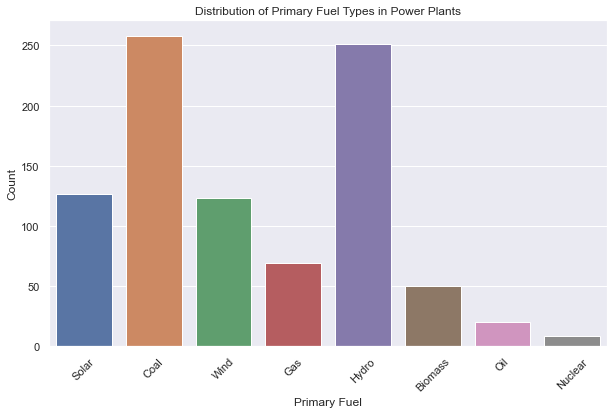

In [138]:
# Assuming 'new_df' is the DataFrame containing your data
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

# Create a countplot for the 'primary_fuel' column
sns.countplot(x="primary_fuel", data=new_df)

# Add labels and title
plt.xlabel("Primary Fuel")
plt.ylabel("Count")
plt.title("Distribution of Primary Fuel Types in Power Plants")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

* Coal and Hydro are high source of power, nuclear being the least

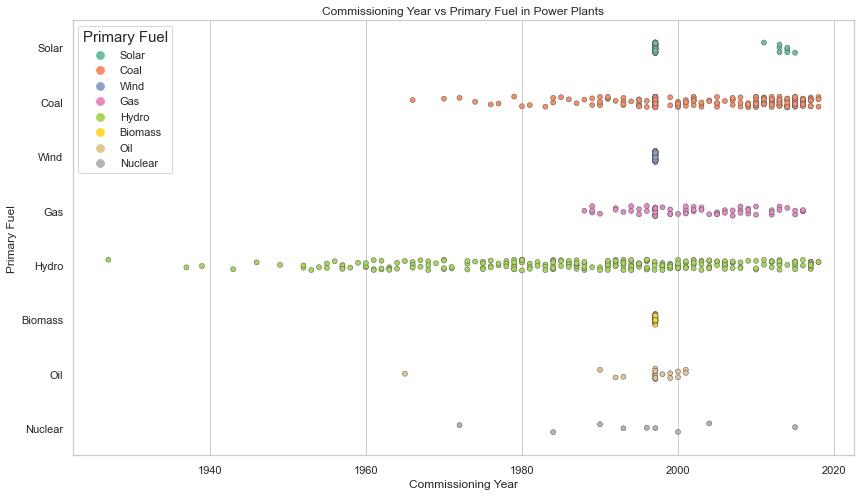

In [139]:
# Commissioning Year vs Primary Fuel in Power Plants
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Create a stripplot for commissioning year vs primary fuel with color representation
sns.stripplot(x="commissioning_year", y="primary_fuel", data=new_df, jitter=True, linewidth=0.5, hue="primary_fuel", palette="Set2")

# Add labels and title
plt.xlabel("Commissioning Year")
plt.ylabel("Primary Fuel")
plt.title("Commissioning Year vs Primary Fuel in Power Plants")

# Add a legend
plt.legend(title="Primary Fuel", title_fontsize='15')

# Show the plot
plt.show()


Based on the above graph Hydro consumption has been from early 1940's. Fuel consumption has been increaing over the years.
Over the time hydro, coal plant operations have increased

## Dealing with outliers

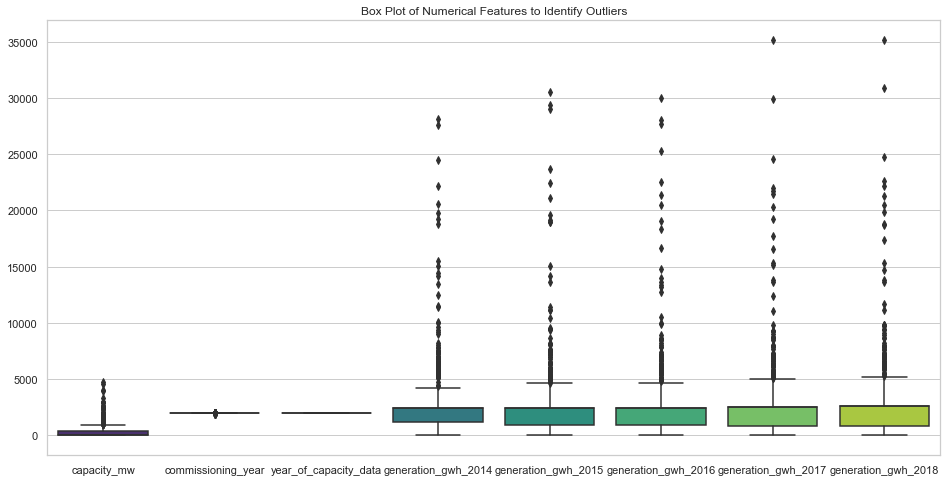

In [140]:

# Assuming 'new_df' is the DataFrame containing your data
numerical_features = new_df.select_dtypes(include=['float64', 'int64'])

# Set up the matplotlib figure
plt.figure(figsize=(16, 8))

# Create a boxplot for numerical features
sns.boxplot(data=numerical_features, palette='viridis')

# Add title
plt.title("Box Plot of Numerical Features to Identify Outliers")

# Show the plot
plt.show()

In [141]:
# Assuming 'new_df' is the DataFrame containing your data
numerical_features = new_df.select_dtypes(include=['float64', 'int64'])

# Define the threshold value
threshold_value = 5000

# Filter the DataFrame to exclude rows with values above the threshold
new_df = new_df[(numerical_features <= threshold_value).all(axis=1)]

# Display the shape of the updated DataFrame
print("Updated DataFrame Shape:", new_df.shape)


Updated DataFrame Shape: (809, 10)


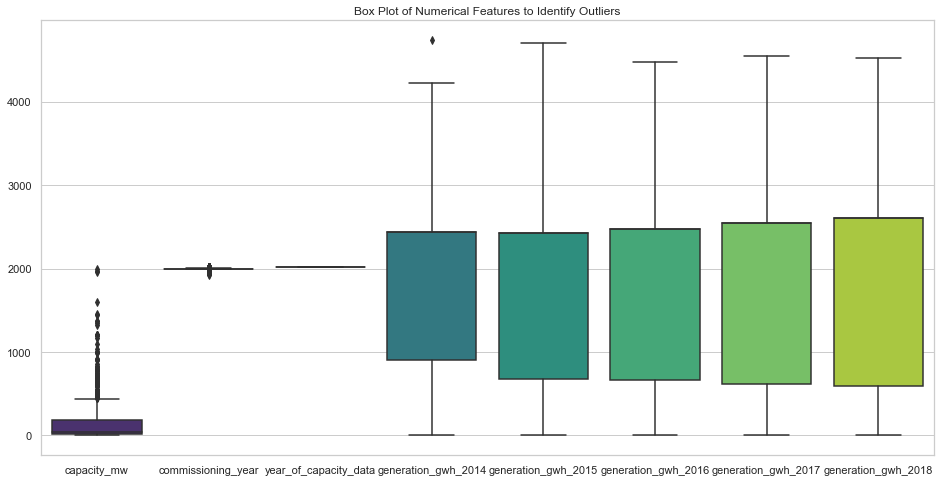

In [142]:

# Assuming 'new_df' is the DataFrame containing your data
numerical_features = new_df.select_dtypes(include=['float64', 'int64'])

# Set up the matplotlib figure
plt.figure(figsize=(16, 8))

# Create a boxplot for numerical features
sns.boxplot(data=numerical_features, palette='viridis')

# Add title
plt.title("Box Plot of Numerical Features to Identify Outliers")

# Show the plot
plt.show()

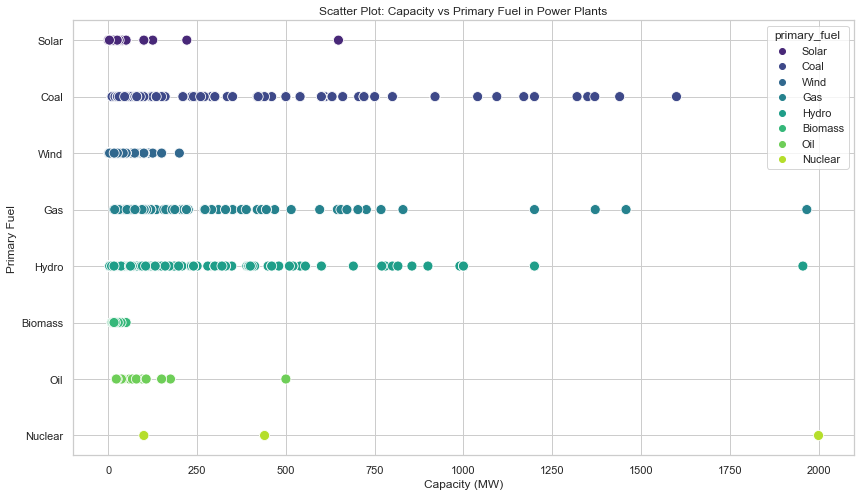

In [143]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Create a scatter plot for primary fuel vs capacity
sns.scatterplot(x="capacity_mw", y="primary_fuel", data=new_df, hue="primary_fuel", palette="viridis", s=100)

# Add labels and title
plt.xlabel("Capacity (MW)")
plt.ylabel("Primary Fuel")
plt.title("Scatter Plot: Capacity vs Primary Fuel in Power Plants")

# Show the plot
plt.show()

In power generating capacity coal has been the highest along with Hydro,gas.

In [144]:
#Power Plants using Nuclear Power
nuclear_power_plants = new_df[new_df['primary_fuel'] == 'Nuclear']

# Print the names of nuclear power plants
print("Power Plants using Nuclear Power:")
print(nuclear_power_plants['name'].tolist())

Power Plants using Nuclear Power:
['DAE RAJASTHAN', 'KAKRAPARA', 'Kudankulam', 'M.A.P.P.', 'N.A.P.S']


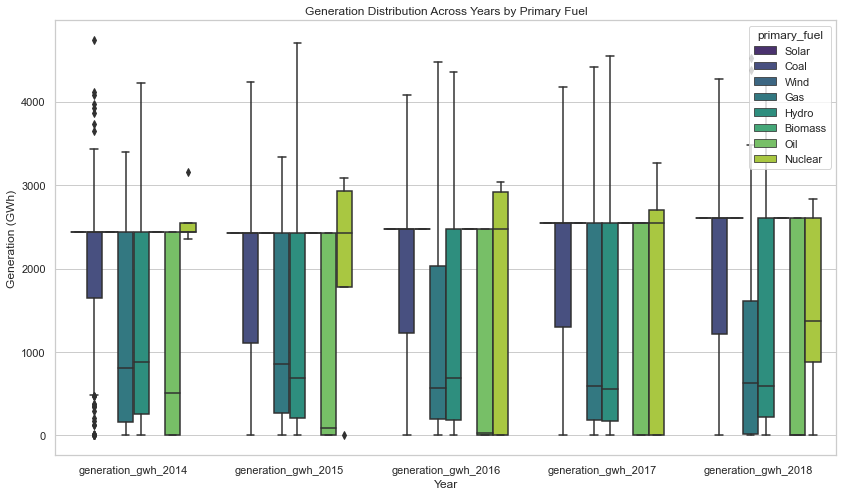

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'new_df' is the DataFrame containing your data
generation_columns = ['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

# Melt the DataFrame to long format for easier plotting
melted_df = new_df.melt(id_vars='primary_fuel', value_vars=generation_columns, var_name='year', value_name='generation_gwh')

# Set the figure size
plt.figure(figsize=(14, 8))

# Create a boxplot for generation values across multiple years by primary fuel
sns.boxplot(x='year', y='generation_gwh', data=melted_df, hue='primary_fuel', palette='viridis')

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Generation (GWh)")
plt.title("Generation Distribution Across Years by Primary Fuel")

# Show the plot
plt.show()


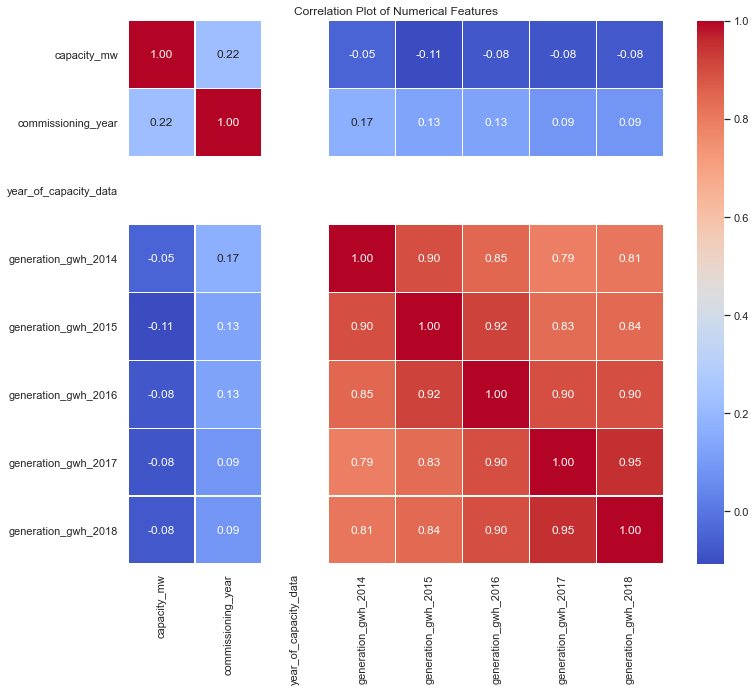

In [146]:
numerical_features = new_df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = new_df[numerical_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a correlation heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title("Correlation Plot of Numerical Features")

# Show the plot
plt.show()


In [147]:
new_df.drop('name', axis=1, inplace=True)
new_df

,capacity_mw,primary_fuel,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,Solar,2011.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,Coal,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,Wind,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,Gas,2004.000000,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
5,250.0,Coal,2005.000000,2019.0,1153.421000,1208.852000,1175.765000,1147.913000,976.655000
...,...,...,...,...,...,...,...,...,...
902,1600.0,Coal,2016.000000,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000
903,3.0,Solar,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,Wind,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,Coal,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [148]:
# Define a mapping of fuel types to numeric values
fuel_type_mapping = {
    'Solar': 1,
    'Coal': 2,
    'Wind': 3,
    'Gas': 4,
    'Hydro': 5,
    'Biomass': 6,
    'Oil': 7,
    'Nuclear': 8
}

# Replace the values in the 'primary_fuel' column with numeric values
new_df['primary_fuel'] = new_df['primary_fuel'].replace(fuel_type_mapping)

# Display the updated DataFrame
new_df.head()

,capacity_mw,primary_fuel,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,1,2011.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,2,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,3,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,4,2004.000000,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
5,250.0,2,2005.000000,2019.0,1153.421000,1208.852000,1175.765000,1147.913000,976.655000


## Modeling

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error,classification_report

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


In [150]:
from sklearn.preprocessing import MinMaxScaler

# Separate the features and labels
X = new_df.drop(['primary_fuel'], axis=1)
y = new_df['primary_fuel']



In [151]:
X.head()

,capacity_mw,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,2011.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,2004.000000,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
5,250.0,2005.000000,2019.0,1153.421000,1208.852000,1175.765000,1147.913000,976.655000


In [152]:
y

0      1
1      2
2      3
3      4
5      2
      ..
902    2
903    1
904    3
905    2
906    3
Name: primary_fuel, Length: 809, dtype: int64

In [153]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

# Convert the target variables to NumPy arrays
y_train = y_train.values
y_test = y_test.values

# Print the shapes of the data splits
print('Shape of X_train = ' + str(X_train.shape))
print('Shape of X_test = ' + str(X_test.shape))
print('Shape of y_train = ' + str(y_train.shape))
print('Shape of y_test = ' + str(y_test.shape))


Shape of X_train = (606, 8)
Shape of X_test = (203, 8)
Shape of y_train = (606,)
Shape of y_test = (203,)


In [155]:
# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Stochastic Gradient Boosting (SGB)': GradientBoostingClassifier(n_estimators=100, subsample=0.5, max_depth=2, random_state=0)
}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    
    # Calculate training and testing accuracy
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    
    report = classification_report(y_test, y_test_pred)  # Use class labels directly
    
    print(f"Classifier: {name}")
    print(f"Training Accuracy: {accuracy_train:.2f}")
    print(f"Testing Accuracy: {accuracy_test:.2f}")
    print(report)
    print("-" * 50)

C:\Users\somas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\somas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\somas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\somas\anaconda3\lib\site-packages\sklearn\metr

Classifier: Random Forest
Training Accuracy: 0.90
Testing Accuracy: 0.64
              precision    recall  f1-score   support

           1       0.60      0.78      0.68        32
           2       0.55      0.62      0.58        42
           3       0.61      0.35      0.45        31
           4       0.33      0.24      0.28        17
           5       0.82      0.89      0.85        62
           6       0.57      0.62      0.59        13
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         1

    accuracy                           0.64       203
   macro avg       0.44      0.44      0.43       203
weighted avg       0.62      0.64      0.62       203

--------------------------------------------------
Classifier: SVM
Training Accuracy: 0.43
Testing Accuracy: 0.43
              precision    recall  f1-score   support

           1       0.29      1.00      0.45        32
           2       0.52      0.38      0.44        42

>"Random Forest" and "Decision Tree" seem to have similar performance, with Random Forest potentially having an edge due to its ensemble nature, which can often lead to better generalization.
> also considering precision, recall, and F1-score,

## We shall consider "Random Forest classifier" as our best suitable model

In [158]:
from sklearn.model_selection import GridSearchCV

## Hyper parameter tuning

In [156]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 5, 10, 15],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_leaf': [1, 2, 4, 8],
    'random_state': [10, 50, 1000]
}

In [159]:
# Create a Grid Search object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the Grid Search on your data
grid_search.fit(X_train, y_train)

# Get the best parameters from the search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_

# Print the best parameters and best accuracy
print("Best Parameters:", best_params)
print("Best Training Accuracy:", best_score)

C:\Users\somas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': 50}
Best Training Accuracy: 0.6368920200514836


In [160]:
# Evaluate the best estimator on the test data
y_test_pred = best_estimator.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy with Best Estimator:", test_accuracy)

Testing Accuracy with Best Estimator: 0.6009852216748769


In [161]:
import pickle

# Specify the file path where you want to save the model
file_path = "Global_power_plant_rfc_model.pkl"

model = RandomForestClassifier()

# Save the model to a pickle file
with open(file_path, 'wb') as file:
    pickle.dump(best_estimator, file)


## Regression model

In [162]:
# Separate the features and labels
X = new_df.drop(['capacity_mw'], axis=1)
y = new_df['capacity_mw']



In [164]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [165]:

# Separate the features and labels
X = new_df.drop(['capacity_mw'], axis=1)
y = new_df['capacity_mw']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the features and transform them
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)



In [166]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_normalized, y_train)

# Random Forest Regressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train_normalized, y_train)

# Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train_normalized, y_train)

# Predictions
y_pred_linear = linear_reg.predict(X_test_normalized)
y_pred_rf = rf_regressor.predict(X_test_normalized)
y_pred_gb = gb_regressor.predict(X_test_normalized)



In [167]:
# Evaluate the models
print("Linear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_linear))
print("R-squared:", r2_score(y_test, y_pred_linear))
print()

print("Random Forest Regressor:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R-squared:", r2_score(y_test, y_pred_rf))
print()

print("Gradient Boosting Regressor:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_gb))
print("R-squared:", r2_score(y_test, y_pred_gb))


Linear Regression:
Mean Squared Error: 63954.41226565909
R-squared: 0.08327714760340688

Random Forest Regressor:
Mean Squared Error: 35483.388799295695
R-squared: 0.4913809346309307

Gradient Boosting Regressor:
Mean Squared Error: 37691.26527809819
R-squared: 0.45973322258598737


The "Random Forest Regressor" has the lowest mean squared error and the highest R-squared value among the three models, making it the better-performing model for this dataset.

## Hyper parameter tuning

In [170]:
from sklearn.metrics import mean_squared_error, make_scorer
# Define the Random Forest Regressor
rf_regressor = RandomForestRegressor()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}



In [171]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring=make_scorer(mean_squared_error), verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring=make_scorer(mean_squared_error), verbose=1)

In [172]:
# Print the best parameters and their corresponding mean squared error
print("Best Parameters: ", grid_search.best_params_)
print("Best Mean Squared Error: {:.2f}".format(grid_search.best_score_))


Best Parameters:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Mean Squared Error: 34828.52


In [173]:
# Evaluate the best model on the test set
best_rf_regressor = grid_search.best_estimator_
y_pred = best_rf_regressor.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print("Testing Mean Squared Error: {:.2f}".format(test_mse))

Testing Mean Squared Error: 34750.57


In [174]:
import pickle

# Save the best Random Forest Regressor model to a file
with open('Gobalpp_random_forest_regressor_model.pkl', 'wb') as file:
    pickle.dump(best_rf_regressor, file)
